In [ ]:
import re                  #package for dealing with regular expressions
import nltk                #package for text handling
import numpy as np         #package to deal with arrays
import pandas as pd        #packages for data analysis
import seaborn as sns      #package for data visulaizations
import plotly.express as px #package for interactive data visualizations
import matplotlib.pyplot as plt #package for data visulaizations

from sklearn.feature_extraction.text import TfidfVectorizer  #dependecy for text vectorization
from imblearn.over_sampling import SMOTE                     #dependency for balancing the imbalance data
from sklearn.model_selection import train_test_split         #dependency for splitting data into training and test dat


# Importing Evaluation matrces
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report, plot_confusion_matrix

# Setting environment to ignore future warnings
import warnings
warnings.simplefilter('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving emotion_data.xlsx to emotion_data.xlsx


In [ ]:
# import  pyxlsb

In [ ]:
import io
emotions_df= pd.read_excel(io.BytesIO(uploaded['emotion_data.xlsx']))

In [ ]:
def make_plots(feature, title="", limited=False, n=10):
    print("Total unique values are: ", len(feature.value_counts()), "\n\n")
    print("Category\tValue\n")
    if limited:
        data = feature.value_counts()[0:n]
    else:
        data = feature.value_counts()
    print(data)
    categories_num = len(data)
    #plotting bar-plot and pie chart
    sns.set_style('darkgrid')
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45)
    plot = sns.barplot(x=data.index, y=data.values, edgecolor="white", palette=sns.palettes.color_palette("icefire"))
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.08
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y), size = 12)
    
    plt.subplot(1,2,2)
    labels = data.index
    plt.pie(x=data, autopct="%.1f%%", explode=[0.02]*categories_num, labels=labels, pctdistance=0.5)
    plt.title(title, fontsize=16)
    plt.show()

In [ ]:
!pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 114 kB 4.9 MB/s 


In [ ]:
import neattext as nt

In [ ]:
emotions_df['Cleaned_Text']=emotions_df['Text'].apply(lambda x:nt.fix_contractions(x))

In [ ]:
emotions_df['Cleaned_Text']=emotions_df['Cleaned_Text'].apply(lambda x:nt.remove_stopwords(x))

In [ ]:
emotions_df['Cleaned_Text']=emotions_df['Cleaned_Text'].apply(lambda x:nt.remove_puncts(x))

In [ ]:
emotions_df['Cleaned_Text']=emotions_df['Cleaned_Text'].apply(lambda x:nt.remove_bad_quotes(x))

In [ ]:
emotions_df['Cleaned_Text']=emotions_df['Cleaned_Text'].apply(lambda x:nt.remove_emojis(x))

In [ ]:
emotions_df['Cleaned_Text']=emotions_df['Cleaned_Text'].apply(lambda x:nt.remove_numbers(x))

In [ ]:
emotions_df['Cleaned_Text']=emotions_df['Cleaned_Text'].apply(lambda x:nt.remove_accents(x))

In [ ]:
emotions_df['Cleaned_Text']=emotions_df['Cleaned_Text'].apply(lambda x:nt.remove_multiple_spaces(x))

In [ ]:
emotions_df['Cleaned_Text']=emotions_df['Cleaned_Text'].apply(lambda x:nt.remove_non_ascii(x))

In [ ]:
emotions_df['Cleaned_Text']=emotions_df['Cleaned_Text'].apply(lambda x:nt.remove_shortwords(x))

In [ ]:
emotions_df['Cleaned_Text']=emotions_df['Cleaned_Text'].apply(lambda x:nt.remove_userhandles(x))

In [ ]:
emotions_df.isnull().sum()

Emotion         0
Text            0
Cleaned_Text    0
dtype: int64

In [ ]:
emotions_df['Cleaned_Text']

0                                                         
1                               sage upgrade list tommorow
2        homegirl baby funeral hate funerals shows blessed
3        true hazel eyeand brilliant regular features o...
4        iluvmiasantos babe hugggzzz babe naamazed babe...
                               ...                        
42267    years invited tutor granddaughter granddaughte...
42268    taken responsibility prepared failed timidity ...
42269    home heard loud sound spitting outside door th...
42270           homework teacher asked scolded immediately
42271         shouted younger brother afraid called loudly
Name: Cleaned_Text, Length: 42272, dtype: object

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(emotions_df.Cleaned_Text)
y = emotions_df["Emotion"]

Total unique values are:  9 


Category	Value

joy         12129
sadness      7801
fear         6488
anger        5377
surprise     4062
neutral      2254
disgust      1913
shame        1191
guilt        1057
Name: Emotion, dtype: int64


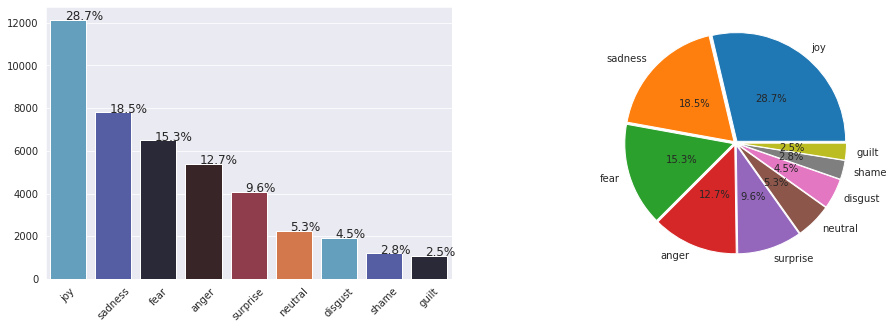

In [ ]:
make_plots(y)

In [ ]:
# Balancing data

In [ ]:
sampler = SMOTE()
X, y = sampler.fit_resample(X, y)

Total unique values are:  9 


Category	Value

neutral     12129
joy         12129
sadness     12129
fear        12129
surprise    12129
anger       12129
shame       12129
disgust     12129
guilt       12129
Name: Emotion, dtype: int64


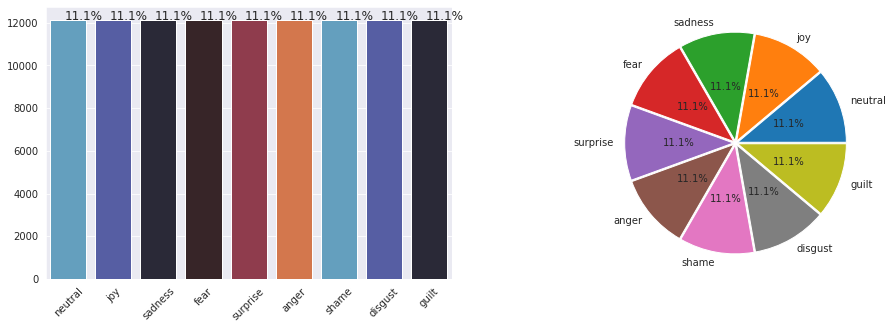

In [ ]:
make_plots(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

+ ==================================================================================================== +
			1-For RandomForestClassifier The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.8363003450487038
--------------------------------------------------
F1 :  [0.83737724 0.87870901 0.85288035 0.96097893 0.68695652 0.82331002
 0.72526158 0.93482359 0.80708607]
--------------------------------------------------
Reacll :  [0.79862259 0.92670876 0.79950152 0.97061247 0.64402174 0.96187364
 0.66905681 0.95672547 0.79961305]
--------------------------------------------------
Precision :  [0.880085   0.83543677 0.9138968  0.95153473 0.73602484 0.7196414
 0.79177546 0.91390205 0.81470008]
--------------------------------------------------
Confusion Matrix....
 [[2899  137   28   24  111  187  104   66   74]
 [  22 3376   11   22   16  105   18   37   36]
 [  59   87 2887   21  131  217   79   37  

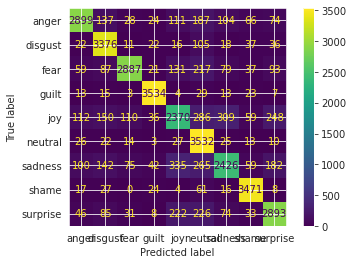

							-----------------------------------------------------------
							 Time for detection (RandomForestClassifier) : 199.318 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			2-For MultinomialNB The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.6115301230571926
--------------------------------------------------
F1 :  [0.57963283 0.67466887 0.53901047 0.7351877  0.54854828 0.4968765
 0.52181987 0.741138   0.61630277]
--------------------------------------------------
Reacll :  [0.50881543 0.67115015 0.627527   0.89288657 0.55190217 0.42238562
 0.46497518 0.780871   0.58512991]
--------------------------------------------------
Precision :  [0.67335035 0.67822469 0.47237857 0.62483183 0.5452349  0.60326721
 0.59449929 0.70525268 0.65098401]
-------------

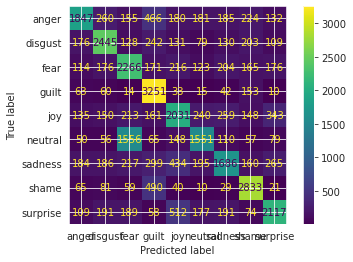

							-----------------------------------------------------------
							 Time for detection (MultinomialNB) : 3.235 seconds...
							-----------------------------------------------------------



In [ ]:
# Importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB




# check the performance on diffrent regressor
models = []
# models.append(('Support Vector Classifier', SVC()))
# models.append(('LogisitcRegression', LogisticRegression()))
# models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('MultinomialNB', MultinomialNB()))


# metrices to store performance
acc = []
pre = []
f1 = []
con = []
rec = []


import time
i = 0
for name,model in models:
    i = i+1
    start_time = time.time()
    
    # Fitting model to the Training set
    clf = model
    clf.fit(X_train, y_train)
    
    # predict values
    y_pred = clf.predict(X_test)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    acc.append(accuracy)
    # Precision
    precision = precision_score(y_test, y_pred, average=None)
    pre.append(precision)
    # Recall
    recall = recall_score(y_test, y_pred, average=None)
    rec.append(recall)
    # F1 Score
    f1_sco = f1_score(y_test, y_pred, average=None)
    f1.append(f1_sco)
    # Confusion Matrix
    confusion_mat = confusion_matrix(y_test, y_pred)
    con.append(confusion_mat)
    # Report
    report = classification_report(y_test, y_pred)


    print("+","="*100,"+")
    print('\033[1m' + f"\t\t\t{i}-For {name} The Performance result is: " + '\033[0m')
    print("+","="*100,"+")
    print('Accuracy : ', accuracy)   
    print("-"*50)
    print('F1 : ', f1_sco)
    print("-"*50)
    print('Reacll : ', recall)
    print("-"*50)
    print('Precision : ', precision)
    print("-"*50)
    print('Confusion Matrix....\n', confusion_mat)
    print("-"*50)
    print('Classification Report....\n', report)
    print("-"*50)
    print('Plotting Confusion Matrix...\n')
    plot_confusion_matrix(clf, X_test, y_test)
    plt.show()


    
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print(f"\t\t\t\t\t\t\t Time for detection ({name}) : {round((time.time() - start_time), 3)} seconds...")
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print()

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print(f"Model's Training Score : {model.score(X_train, y_train)}")
print(f"Model's Testing  Score : {model.score(X_test, y_test)}")

Model's Training Score : 0.9892294404020311
Model's Testing  Score : 0.8365446273168646


In [ ]:
!pip install pickle5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 256 kB 4.9 MB/s 


In [ ]:
# save the model to disk
import pickle as pkl

# filename = 'finalized_model.sav'
# pkl.dump(model, open(filename, 'wb'))

In [ ]:
model_save_name = 'emotions_classifier.pkl'
path = F"/content/gdrive/My Drive/Colab Notebooks/{model_save_name}" 

pkl.dump(model, open(model_save_name, 'wb'))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
